## Plotting the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read data

In [2]:
# path  = 'Dataset/Dhaka Rent.csv'
# data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
# data.head()

# data = pd.read_csv('../input/population-profit/Population_Profit.txt', names=['Population', 'Profit'])

data = pd.read_csv('Datasets/Population_Profit.txt',names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# visualizing the data

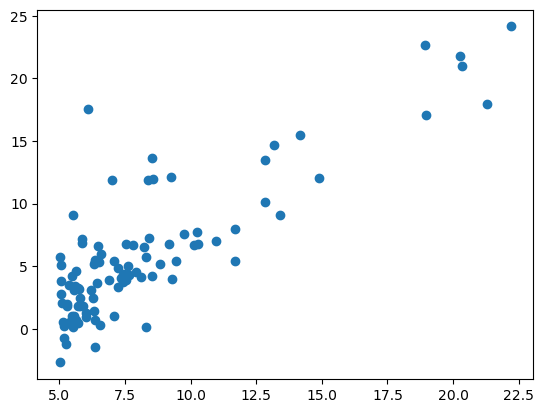

In [3]:
# data.plot(kind='scatter', x='Population', y='Profit', figsize=(12, 8))
# plt.show

plt.scatter(data.Population,data.Profit)
plt.show()

## Cost Function



In [4]:
# insert a column
data.insert(0,'Ones',1)
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [5]:
# split data to X and Y
cols = data.shape[1]
X = data.iloc[:, 0:cols-1]
Y = data.iloc[:, cols-1:cols]

In [6]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [7]:
Y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [8]:
# convert X and Y into matrix
X = np.matrix(X.values)
Y = np.matrix(Y.values)

theta = np.matrix(np.array([0,0]))

X.shape, Y.shape, theta.shape


((98, 2), (98, 1), (1, 2))

formula of cost function
![](img/cost.png)

In [9]:
# cost function 
def computeCost(X, Y, theta):
    inner = np.power((X * theta.T)-Y, 2)
    return np.sum(inner) / (2 * len(X))

In [10]:
computeCost(X, Y, theta)

31.81715114528776

## Gradient Descent
![](img/gradient.png)

In [11]:
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = X * theta.T - Y
        
        for j in range(parameters):    
            term = np.multiply(error, X[:, j])
            temp[0, j] = temp[0, j] - alpha / len(X) * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X, Y, theta)
        
    return theta, cost
    
    

In [12]:
#learning rate
alpha = 0.01
# epoch
iters = 1000

theta1, cost = gradientDescent(X, Y, theta, alpha, iters)
theta1

matrix([[-3.24799086,  1.12667581]])

In [13]:
# cost of model
print("cost of model")
print("before training:", computeCost(X, Y, theta))
print("after training:", computeCost(X, Y, theta1))

cost of model
before training: 31.81715114528776
after training: 4.478594730077563


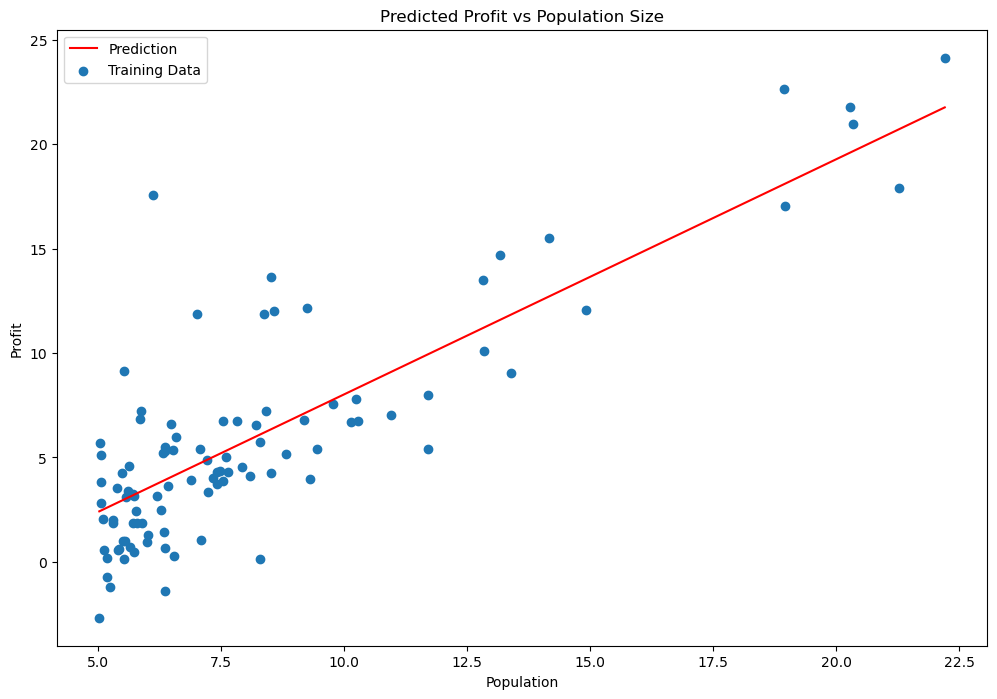

In [14]:
# fit image
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = theta1[0, 0] +  theta1[0, 1] * x

plt.figure(figsize = (12, 8))
plt.xlabel("Population")
plt.ylabel("Profit")
l1 = plt.plot(x, f, label="Prediction", color='red')
l2 = plt.scatter(data.Population, data.Profit, label="Training Data")
plt.legend(loc="best")
plt.title("Predicted Profit vs Population Size")
plt.show()

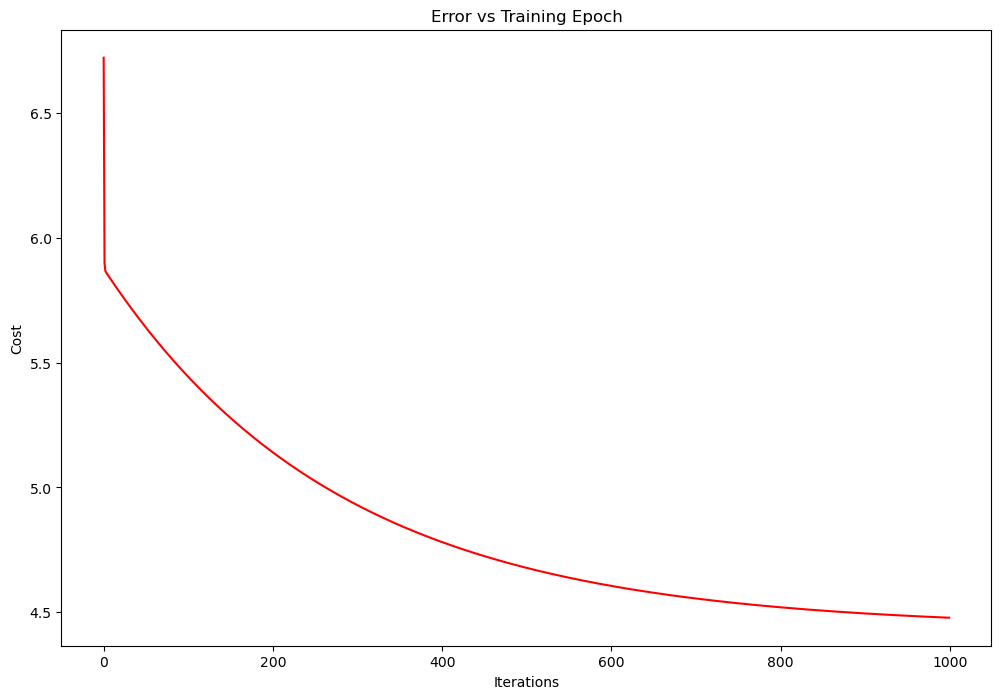

In [15]:
# Trend of cost
plt.figure(figsize=(12, 8))
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title("Error vs Training Epoch")
plt.plot(np.arange(iters), cost, 'r')
plt.show()